## Gather

In [503]:
import pandas as pd
import numpy as np
import requests
import os
import json
import time
import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# Displaying the full string from a pandas DataFrame
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

<ipython-input-503-0eea56ad7168>:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [606]:
# Download the WeRateDogs Twitter archive
WeRateDogs_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Tweet Image Prediction File

#### Below, the tweet image predictions, which represent what breed of dog, other subject or animal is present in each tweet (according to  a neural network), will be downloaded programmatically, using using the [Requests](https://pypi.org/project/requests/) library and the [URL](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) provided by Udacity. Then they'll be viewied and saved as a pandas DataFrame to the computer.

In [405]:
# Download the image predictions with the provided url.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

Success status response code, <Response [200]>, indicates that the request has succeeded.

In [406]:
# Save the file to the computer
image_predictions = url.split('/')[-1]

with open(os.path.join('./', image_predictions), mode='wb') as file:
        file.write(response.content)

In [407]:
# Save image predictions file into the image_predictions_df dataframe and viewing the dataframe
image_predictions_df = pd.read_csv(image_predictions, sep = '\\t', engine = 'python')

### Tweet JSON Data

Below, the tweet data stored in JSON for each of the tweets in the WeRateDogs Twitter archive will be querried using  Python's Tweepy library. Each tweet's JSON data will be written to its own line in a file called tweet_json.txt file and then read line by line into a pandas DataFrame with the required fields. tweet ID, retweet count, and favorite count. 

In [6]:
import tweepy

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Create Twitter API object and setting rate limit parameters
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [8]:
# get the tweet status
status = api.get_status(WeRateDogs_twitter_archive.tweet_id[1], tweet_mode='extended')

In [9]:
# Create tweet_json.txt file if it doesn't already exist
file = 'tweet_json.txt'
if not os.path.isfile(file):
    open(file, 'w', encoding = 'UTF-8')

In [408]:
# Get a list of tweet_ids from the enhanced twitter archive to use for downloading with the Twitter API
tweet_ids = WeRateDogs_twitter_archive.tweet_id.values
print("# of tweet_ids: " + str(len(tweet_ids)))

# of tweet_ids: 2356


In [11]:
tweet_errors = []

# get start time of query
print("Start time:", datetime.datetime.now().time())
start = time.time()

# write JSON to .txt file
with open('tweet_json.txt', 'w', encoding = 'UTF-8') as file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except Exception as e:
            print("Error in Tweet ID:", tweet_id, "Time:",  datetime.datetime.now().time())
            tweet_errors.append(tweet_id)

# get end time of query
end = time.time()
print("End time:", datetime.datetime.now().time())

# display runtime
print("Runtime: ", end - start)

Start time: 23:56:38.744619
Error in Tweet ID: 888202515573088257 Time: 23:56:45.117944
Error in Tweet ID: 873697596434513921 Time: 23:57:09.417954
Error in Tweet ID: 872668790621863937 Time: 23:57:11.183406
Error in Tweet ID: 872261713294495745 Time: 23:57:12.074551
Error in Tweet ID: 869988702071779329 Time: 23:57:16.278227
Error in Tweet ID: 866816280283807744 Time: 23:57:20.669660
Error in Tweet ID: 861769973181624320 Time: 23:57:27.858063
Error in Tweet ID: 856602993587888130 Time: 23:57:36.374745
Error in Tweet ID: 851953902622658560 Time: 23:57:45.876044
Error in Tweet ID: 845459076796616705 Time: 23:57:57.956453
Error in Tweet ID: 844704788403113984 Time: 23:58:00.050356
Error in Tweet ID: 842892208864923648 Time: 23:58:02.347692
Error in Tweet ID: 837366284874571778 Time: 23:58:15.068424
Error in Tweet ID: 837012587749474308 Time: 23:58:15.724651
Error in Tweet ID: 829374341691346946 Time: 23:58:35.711400
Error in Tweet ID: 827228250799742977 Time: 23:58:41.618540
Error in Twe

Rate limit reached. Sleeping for: 620


Error in Tweet ID: 754011816964026368 Time: 00:11:56.218438
Error in Tweet ID: 680055455951884288 Time: 00:16:01.656399


Rate limit reached. Sleeping for: 625


End time: 00:29:41.096329
Runtime:  1982.3360526561737


In [12]:
# display IDs of tweets with errors
tweet_errors

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 754011816964026368,
 680055455951884288]

In [13]:
# Extract JSON data from the text file, and save it to a DataFrame
tweets_json_data = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        tweets_json_data.append({'tweet_id': data['id'], 
                          'retweet_count': data['retweet_count'], 
                          'favorite_count': data['favorite_count']
                         })

# Create DataFrame from tweets_json_data dictionary 
tweets_api_df = pd.DataFrame(tweets_json_data, 
                               columns = ['tweet_id', 
                                          'retweet_count', 
                                          'favorite_count'])

tweets_api_df.head()                

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7436,35261
1,892177421306343426,5527,30519
2,891815181378084864,3648,22948
3,891689557279858688,7612,38551
4,891327558926688256,8194,36834


In [14]:
# Save the DataFrame object into a csv file without the preceding indices of each row
tweets_api_df.to_csv('tweets_api.csv', index=False)

## Assess

#### Visual Assessment

In [607]:
# Display the WeRateDogs_twitter_archive table
WeRateDogs_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [608]:
# Display the image_predictions table
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [411]:
# Read and display the Tweepy tweets table
tweets_api = pd.read_csv('tweets_api.csv')
tweets_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7436,35261
1,892177421306343426,5527,30519
2,891815181378084864,3648,22948
3,891689557279858688,7612,38551
4,891327558926688256,8194,36834
...,...,...,...
2326,666049248165822465,39,95
2327,666044226329800704,123,262
2328,666033412701032449,39,108
2329,666029285002620928,41,118


`WeRateDogs_twitter_archive`
- Dog names have missing values
- text column includes several data types (URLs, ratings and strings)

`tweets_api`
- columns can be merged with those of the `WeRateDogs_twitter_archive` table

#### Programmatic Assessment

In [609]:
WeRateDogs_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
70,879008229531029506,NaN,NaN,2017-06-25 16:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Beau. That is Beau's balloon. He takes it everywhere. 13/10 would protect at all costs https://t.co/YDtpCjIPKN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879008229531029506/photo/1,13,10,Beau,None,None,None,None
1645,683849932751646720,NaN,NaN,2016-01-04 03:18:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jiminy. He's not the brightest dog. Needs to lay off the kibble. 5/10 still petable https://t.co/omln4LOy1x,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683849932751646720/photo/1,5,10,Jiminy,None,None,None,None
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,"https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1",13,10,Astrid,doggo,None,None,None
1265,709901256215666688,NaN,NaN,2016-03-16 00:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","WeRateDogs stickers are here and they're 12/10! Use code ""puppers"" at checkout 🐶🐾\n\nShop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r",NaN,NaN,NaN,"http://goo.gl/ArWZfi,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1,https://twitter.com/dog_rates/status/709901256215666688/photo/1",12,10,None,None,None,None,None
1439,696894894812565505,NaN,NaN,2016-02-09 03:14:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",These two pirates crashed their ship and don't know what to do now. Very irresponsible of them. Both 9/10 https://t.co/RJvUjgGH5z,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696894894812565505/photo/1,9,10,None,None,None,None,None
874,761292947749015552,NaN,NaN,2016-08-04 20:09:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Bonaparte. He's pupset because it's cloudy at the beach. Can't take any pics for his Instagram. 11/10 https://t.co/0THNOfv2Jo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761292947749015552/photo/1,11,10,Bonaparte,None,None,None,None
1776,677961670166224897,NaN,NaN,2015-12-18 21:20:32 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Izzy. She's showing off the dance moves she's been working on. 11/10 I guess hard work pays off https://t.co/4JS92YAxTi,NaN,NaN,NaN,https://vine.co/v/iKuMDuYV0aZ,11,10,Izzy,None,None,None,None
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow! https://t.co/Dmy2mY2Qj5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668955713004314625/photo/1,10,10,a,None,None,None,None
1233,712809025985978368,NaN,NaN,2016-03-24 01:11:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stubert. He just arrived. 10/10 https://t.co/HVGs5aAKAn,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712809025985978368/photo/1,10,10,Stubert,None,None,None

In [610]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1555,793195938047070209,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,2,Labrador_retriever,0.654762,True,golden_retriever,0.074100,True,Chihuahua,0.042339,True
253,670727704916926465,https://pbs.twimg.com/media/CU7nSZEW4AA6r5u.jpg,1,wood_rabbit,0.368562,False,tabby,0.309675,False,Egyptian_cat,0.154914,False
991,708026248782585858,https://pbs.twimg.com/ext_tw_video_thumb/708026062568087553/pu/img/rNhylAwIfb6YthGu.jpg,1,malinois,0.786468,True,Chesapeake_Bay_retriever,0.068979,True,Siamese_cat,0.029304,False
1498,783695101801398276,https://pbs.twimg.com/media/CuA-iRHXYAAWP8e.jpg,3,chow,0.314265,True,golden_retriever,0.300435,True,Australian_terrier,0.049487,True
453,674754018082705410,https://pbs.twimg.com/media/CV01M3ZWIAAV7rv.jpg,1,seashore,0.352321,False,promontory,0.131753,False,wreck,0.095597,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
1560,793271401113350145,https://pbs.twimg.com/media/CwJEIKTWYAAvL-T.jpg,1,Siberian_husky,0.231695,True,Eskimo_dog,0.206749,True,Pembroke,0.070120,True
921,701981390485725185,https://pbs.twimg.com/media/Cb3wWWbWEAAy06k.jpg,1,Pomeranian,0.491022,True,weasel,0.130879,False,Yorkshire_terrier,0.099241,True
393,673583129559498752,https://pbs.twimg.com/media/CVkMRUeWsAA9bMh.jpg,1,Arctic_fox,0.153271,False,golden_retriever,0.113946,True,borzoi,0.110718,True
362,672834301050937345,https://pbs.twimg.com/media/CVZjOktVAAAtigw.jpg,1,Pembroke,0.582560,True,Cardigan,0.258869,True,nipple,0.033835,False


In [414]:
tweets_api.sample(10)

,tweet_id,retweet_count,favorite_count
1116,727685679342333952,613,2864
293,835685285446955009,7869,0
1266,708130923141795840,824,3274
938,750868782890057730,1319,4662
79,877316821321428993,4607,25185
262,840698636975636481,2,171
1301,706166467411222528,1542,4983
981,747651430853525504,148,1338
1126,726224900189511680,1099,4281
1927,673680198160809984,434,1287


In [611]:
WeRateDogs_twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [612]:
WeRateDogs_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [613]:
WeRateDogs_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [614]:
WeRateDogs_twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [615]:
WeRateDogs_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [420]:
image_predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [421]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [422]:
tweets_api.tail()

,tweet_id,retweet_count,favorite_count
2326,666049248165822465,39,95
2327,666044226329800704,123,262
2328,666033412701032449,39,108
2329,666029285002620928,41,118
2330,666020888022790149,445,2350


In [423]:
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


### Quality

#### `WeRateDogs_twitter_archive` 

- *retweeted_status_id* is a float and not an integer
- Multiple formats for *retweeted_status_id*
- *retweeted_status_user_id* is a float and not an integer
- Multiple formats for *retweeted_status_user_id*
- *retweeted_status_timestamp* is a string and not a datetime object
- Missing records in (*in_reply_to_status_id, in_reply_to_user_id, retweeted_user_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls* columns)(**can't clean**)
- Odd values for *rating_numerator* and some erroneous values for *rating_denominator*
- There are 4 categorical values in the `source` column. Twitter for iPhone, Vine - Make a Scene, Twitter Web Client, TweetDeck

#### `image_predictions_df` 

- Lower case *p1* names sometimes, upper case other times
- Lower case *p2* names sometimes, upper case other times
- Lower case *p3* names sometimes, upper case other times
- Erroneous/unrelated information where *p1_dog*, *p2_dog* and *p3_dog* are all False 
- Missing dog name information for *name* column

### Tidiness

#### `WeRateDogs_twitter_archive` 

- *doggo*, *floofer*, *pupper* and *puppo* columns can be merged into one column (*dog_stages*) and the data type for the *dog_stages* needs to be categorical
- Two variables in the text column should be split into text and short_urls
- The key points in the project description indicate that we are only interested in original tweets and not in retweets. The columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` can be removed to make the table cleaner. Same goes for `in_reply_to_status_id` and `in_reply_to_user_id`

## Clean

In [667]:
# First make a copy of all the data that you want to clean
WeRateDogs_twitter_arch_clean = WeRateDogs_twitter_archive.copy()
image_predictions_clean = image_predictions_df.copy()
tweets_api_clean = tweets_api.copy()

### Missing Data

#### Define

As shown in the cells below, there's a great amount of missing and erroneus (as Python keeps converting the tweet's large numerical id's to scientific notation when we try to write it to a CSV file). data in the WeRateDogs_twitter_arch_clean table columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. We don't have any resource to collect and clean this data so we will not be able to make conclusions from these columns. These columns can remove these columns to make our table cleaner.

In [668]:
WeRateDogs_twitter_arch_clean['in_reply_to_status_id'].value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
               ..
8.482121e+17    1
6.715449e+17    1
6.936422e+17    1
6.849598e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [669]:
WeRateDogs_twitter_arch_clean['in_reply_to_user_id'].value_counts()

4.196984e+09    47
2.195506e+07    2 
7.305050e+17    1 
2.916630e+07    1 
3.105441e+09    1 
2.918590e+08    1 
2.792810e+08    1 
2.319108e+09    1 
1.806710e+08    1 
3.058208e+07    1 
2.625958e+07    1 
1.943518e+08    1 
3.589728e+08    1 
8.405479e+17    1 
2.894131e+09    1 
2.143566e+07    1 
2.281182e+09    1 
1.648776e+07    1 
4.717297e+09    1 
2.878549e+07    1 
1.582854e+09    1 
4.670367e+08    1 
4.738443e+07    1 
1.361572e+07    1 
1.584641e+07    1 
2.068372e+07    1 
1.637468e+07    1 
1.185634e+07    1 
1.198989e+09    1 
1.132119e+08    1 
7.759620e+07    1 
Name: in_reply_to_user_id, dtype: int64

In [670]:
WeRateDogs_twitter_arch_clean['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [671]:
WeRateDogs_twitter_arch_clean['retweeted_status_user_id'].value_counts()

4.196984e+09    156
4.296832e+09    2  
5.870972e+07    1  
6.669901e+07    1  
4.119842e+07    1  
7.475543e+17    1  
7.832140e+05    1  
7.266347e+08    1  
4.871977e+08    1  
5.970642e+08    1  
4.466750e+07    1  
1.228326e+09    1  
7.992370e+07    1  
2.488557e+07    1  
7.874618e+17    1  
3.638908e+08    1  
5.128045e+08    1  
8.117408e+08    1  
1.732729e+09    1  
1.960740e+07    1  
1.547674e+08    1  
3.410211e+08    1  
7.124572e+17    1  
2.804798e+08    1  
1.950368e+08    1  
Name: retweeted_status_user_id, dtype: int64

In [672]:
WeRateDogs_twitter_arch_clean['retweeted_status_timestamp'].value_counts()

2016-03-01 20:11:59 +0000    1
2017-05-06 17:49:42 +0000    1
2016-09-14 17:40:06 +0000    1
2017-05-05 18:36:06 +0000    1
2016-09-25 00:06:08 +0000    1
                            ..
2016-03-21 19:29:52 +0000    1
2016-01-03 05:11:12 +0000    1
2016-02-18 02:24:13 +0000    1
2017-01-20 00:50:15 +0000    1
2017-06-08 03:32:35 +0000    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

#### Code

In [673]:
WeRateDogs_twitter_arch_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 
                                            'retweeted_status_id', 'retweeted_status_user_id',
                                            'retweeted_status_timestamp'], inplace = True)

#### Test

In [674]:
# Confirm the columns are gone
list(WeRateDogs_twitter_arch_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Define

 Convert timestamp to datetime data type

#### Code

In [675]:
WeRateDogs_twitter_arch_clean.timestamp = pd.to_datetime(WeRateDogs_twitter_arch_clean.timestamp)

#### Test

In [676]:
# Confirm data types
WeRateDogs_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Define

Replace the `source` column with the display portion of itself. Extract the string between `<a href=""> and </a>` and change the data type to categorical.

#### Code

In [677]:
WeRateDogs_twitter_arch_clean['source'] = WeRateDogs_twitter_arch_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [678]:
WeRateDogs_twitter_arch_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene    91  
Twitter Web Client     33  
TweetDeck              11  
Name: source, dtype: int64

In [679]:
# Change the data type to categorical
WeRateDogs_twitter_arch_clean['source'] = WeRateDogs_twitter_arch_clean.source.astype('category')

#### Test

In [680]:
WeRateDogs_twitter_arch_clean.dtypes

tweet_id              int64              
timestamp             datetime64[ns, UTC]
source                category           
text                  object             
expanded_urls         object             
rating_numerator      int64              
rating_denominator    int64              
name                  object             
doggo                 object             
floofer               object             
pupper                object             
puppo                 object             
dtype: object

#### Define

Convert names to upper case in  WeRateDogs_twitter_arch_clean table. Replace the erroneous names like "a"  and "None" with NaN (missing value). Repeat the same thing for dog stages in image_predictions_clean table

#### Code

In [681]:
import numpy as np

In [682]:
# check the dog names to look for any unrelated/worng name
name_check = WeRateDogs_twitter_arch_clean.name.value_counts().to_frame()
name_check_transposed = name_check.T
name_check_transposed.head()

,None,a,Charlie,Cooper,Oliver,Lucy,Lola,Tucker,Penny,Winston,...,Spencer,Aldrick,Chuq,Huxley,Lulu,Zoe,Obi,officially,William,Jangle
name,745,55,12,11,11,11,10,10,10,9,...,1,1,1,1,1,1,1,1,1,1


In [683]:
WeRateDogs_twitter_arch_clean.name.replace(to_replace=[None], value=np.nan, inplace=True)
WeRateDogs_twitter_arch_clean.name.replace(['a', 'Not','The'], np.nan, inplace=True) 
image_predictions_clean.p1 = image_predictions_clean.p1.str.capitalize()
image_predictions_clean.p2 = image_predictions_clean.p2.str.capitalize()
image_predictions_clean.p3 = image_predictions_clean.p3.str.capitalize()

#### Test

In [684]:
WeRateDogs_twitter_arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [685]:
columns = [image_predictions_clean.p1, image_predictions_clean.p2, image_predictions_clean.p3]
columns

[0       Welsh_springer_spaniel
 1       Redbone               
 2       German_shepherd       
 3       Rhodesian_ridgeback   
 4       Miniature_pinscher    
                ...            
 2070    Basset                
 2071    Paper_towel           
 2072    Chihuahua             
 2073    Chihuahua             
 2074    Orange                
 Name: p1, Length: 2075, dtype: object,
 0       Collie            
 1       Miniature_pinscher
 2       Malinois          
 3       Redbone           
 4       Rottweiler        
            ...            
 2070    English_springer  
 2071    Labrador_retriever
 2072    Malamute          
 2073    Pekinese          
 2074    Bagel             
 Name: p2, Length: 2075, dtype: object,
 0       Shetland_sheepdog          
 1       Rhodesian_ridgeback        
 2       Bloodhound                 
 3       Miniature_pinscher         
 4       Doberman                   
           ...                      
 2070    German_short-haired_pointer
 

In [686]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Define

Remove the rows from `image_predictions_clean` table where the values in columns 'p1_dog', 'p2_dog', 'p3_dog' are all False.

#### Code

In [687]:
image_predictions_clean.drop(image_predictions_clean.loc[(image_predictions_clean['p1_dog']== False) & 
                                                         (image_predictions_clean['p2_dog']== False) & 
                                                         (image_predictions_clean['p3_dog']== False)].index, 
                             inplace=True)

#### Test

In [688]:
[image_predictions_clean.p1_dog, 
 image_predictions_clean.p2_dog, 
 image_predictions_clean.p3_dog] == False

False

#### Define

Extract the urls form `WeRateDogs_twitter_arch_clean` text column and move it to a new column called `short_urls`

#### Code

In [689]:
# Get length of short url
short_url_length = len(WeRateDogs_twitter_arch_clean['text'][0].split()[-1])+1
short_url_length

# New column with short url
WeRateDogs_twitter_arch_clean['short_urls'] = WeRateDogs_twitter_arch_clean['text'].apply(lambda row: row[-short_url_length:])

# Remove the short urls from text column
WeRateDogs_twitter_arch_clean['text'] = WeRateDogs_twitter_arch_clean['text'].apply(lambda row: row[:-short_url_length])

#### Test

In [690]:
WeRateDogs_twitter_arch_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,short_urls
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://t.co/wUnZnhtVJB


#### Define

Some values for *rating_numerator* and *rating_denominator* are incorrect

#### Code

In [691]:
# Find the numerator and denominator values and save them in the correct columns (*rating_numerator* and 
# *rating_denominator*)

# Correct format of ratings string match
corr_format = WeRateDogs_twitter_arch_clean.text.str.contains('\d+/10')

# Remove rows that do not match the correct format
WeRateDogs_twitter_arch_clean = WeRateDogs_twitter_arch_clean[corr_format].copy()

# Extract numerators and denominators
extract = WeRateDogs_twitter_arch_clean.text.str.extract('(\d+/10)', expand = False).copy()

WeRateDogs_twitter_arch_clean['rating_numerator'] = extract.apply(lambda x: int(str(x)[:-3]))
WeRateDogs_twitter_arch_clean['rating_denominator'] = 10

#### Test

In [692]:
WeRateDogs_twitter_arch_clean.rating_numerator.describe()

count    2272.000000
mean     11.878081  
std      39.051791  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [693]:
WeRateDogs_twitter_arch_clean.rating_denominator.describe()

count    2272.0
mean     10.0  
std      0.0   
min      10.0  
25%      10.0  
50%      10.0  
75%      10.0  
max      10.0  
Name: rating_denominator, dtype: float64

In [694]:
WeRateDogs_twitter_arch_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,short_urls
644,793180763617361921,2016-10-31 20:00:05+00:00,Twitter for iPhone,This is Newt. He's a strawberry. 11/10,https://twitter.com/dog_rates/status/793180763617361921/photo/1,11,10,Newt,None,None,None,None,https://t.co/2VhmlwxA1Q
2178,669015743032369152,2015-11-24 04:52:37+00:00,Twitter for iPhone,Super rare dog right here guys. Doesn't bark. Seems strong. Blue. Very family friendly pet. 10/10 overall good dog,https://twitter.com/dog_rates/status/669015743032369152/photo/1,10,10,None,None,None,None,None,https://t.co/Jykq2iq3qN


#### Define

Merge the `doggo`, `floofer`, `pupper`, `puppo` columns into a `dog_stages` column and change the data type to categorical.

In [695]:
WeRateDogs_twitter_arch_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2272,2272,2272,2272
unique,2,2,2,2
top,None,None,None,None
freq,2178,2262,2017,2242


#### Code

In [696]:
# replace the stage name with 1, and 'None' with 0, like a dummy variable
dummy = lambda x: 0 if x == 'None' else 1

WeRateDogs_twitter_arch_clean.doggo = WeRateDogs_twitter_arch_clean.doggo.apply(dummy)
WeRateDogs_twitter_arch_clean.floofer = WeRateDogs_twitter_arch_clean.floofer.apply(dummy)
WeRateDogs_twitter_arch_clean.pupper = WeRateDogs_twitter_arch_clean.pupper.apply(dummy)
WeRateDogs_twitter_arch_clean.puppo = WeRateDogs_twitter_arch_clean.puppo.apply(dummy)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
WeRateDogs_twitter_arch_clean['none'] = WeRateDogs_twitter_arch_clean['doggo'] + \
WeRateDogs_twitter_arch_clean['floofer'] + WeRateDogs_twitter_arch_clean['pupper'] + \
WeRateDogs_twitter_arch_clean['puppo']

# let's have a look at what we have before we continue...
WeRateDogs_twitter_arch_clean['none'].value_counts()

0    1897
1    361 
2    14  
Name: none, dtype: int64

In the above cell, we can see an interesting finding. There are 14 tweets that have 2 dog stages. These must be tweets about more than one dog. Since there are 14 entries, I'll select the dog stages in increasing order of floofer, puppo, doggo and pupper to avoid losing too much information.

In [697]:
# if there are no stages specified then set to 1
stage_none = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
WeRateDogs_twitter_arch_clean['none'] = WeRateDogs_twitter_arch_clean['none'].apply(stage_none)

# Stages in increasing count order: floofer, puppo, doggo and pupper
stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# Set the conditions for selecting the dog stage based on count order
conditions = [
    (WeRateDogs_twitter_arch_clean[stage[0]] == 1),
    (WeRateDogs_twitter_arch_clean[stage[1]] == 1),
    (WeRateDogs_twitter_arch_clean[stage[2]] == 1),
    (WeRateDogs_twitter_arch_clean[stage[3]] == 1),
    (WeRateDogs_twitter_arch_clean[stage[4]] == 1)]

# select the dog stage based on the first successful condition; stage[4] is 'None'
WeRateDogs_twitter_arch_clean['stage'] = np.select(conditions, stage, default = stage[4])

# drop the original 4 stage columns, and the temporary 'none'
WeRateDogs_twitter_arch_clean.drop(stage, axis = 1, inplace = True)

# Set the 'stage' column data type to category
WeRateDogs_twitter_arch_clean['stage'] = WeRateDogs_twitter_arch_clean.stage.astype('category')

#### Test

In [698]:
WeRateDogs_twitter_arch_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,short_urls,stage
1020,746757706116112384,2016-06-25 17:31:25+00:00,Vine - Make a Scene,This is Maddie. She gets some wicked air time. Hardcore barkour. 11/10 nimble af,https://vine.co/v/5BYq6hmrEI3,11,10,Maddie,https://t.co/bROYbceZ1u,none
2069,671134062904504320,2015-11-30 01:10:04+00:00,Twitter for iPhone,Say hello to Clarence. He's a western Alkaline Pita. Very proud of himself for dismembering his stuffed dog pal 8/10,https://twitter.com/dog_rates/status/671134062904504320/photo/1,8,10,Clarence,https://t.co/BHxr9O7wJY,none
739,780601303617732608,2016-09-27 02:53:48+00:00,Twitter for iPhone,Meet Hercules. He can have whatever he wants for the rest of eternity. 12/10 would snug passionately,https://twitter.com/dog_rates/status/780601303617732608/photo/1,12,10,Hercules,https://t.co/mH0IOyFdIG,none
1116,732585889486888962,2016-05-17 14:57:41+00:00,Twitter for iPhone,"When your teacher agreed on 10,000 RTs and no final but after 24 hours you only have 37... 10/10","https://twitter.com/dog_rates/status/732585889486888962/photo/1,https://twitter.com/dog_rates/status/732585889486888962/photo/1",10,10,None,https://t.co/sVnJfWVjUp,none
465,817181837579653120,2017-01-06 01:31:47+00:00,Twitter for iPhone,RT @dog_rates: Here's a pupper with squeaky hiccups. Please enjoy. 13/10,"https://twitter.com/dog_rates/status/815966073409433600/video/1,https://twitter.com/dog_rates/status/815966073409433600/video/1",13,10,None,https://t.co/MiMKtsLN6k,pupper
2342,666082916733198337,2015-11-16 02:38:37+00:00,Twitter for iPhone,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6,10,None,https://t.co/3RU6x0vHB7,none
2183,668989615043424256,2015-11-24 03:08:48+00:00,Twitter for iPhone,This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh,https://twitter.com/dog_rates/status/668989615043424256/photo/1,3,10,Bernie,https://t.co/1zBp1moFlX,none
2262,667546741521195010,2015-11-20 03:35:20+00:00,Twitter Web Client,Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10,https://twitter.com/dog_rates/status/667546741521195010/photo/1,9,10,George,https://t.co/afRtVsoIIb,none
1359,703356393781329922,2016-02-26 23:10:06+00:00,Twitter for iPhone,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9,10,Socks,https://t.co/8rc5I22bBf,none
2240,667924896115245057,2015-11-21 04:37:59+00:00,Twitter for iPhone,This is Jiminy. He has always wanted to be a cheerleader. Can jump high enough to get on other dog. Go Jiminy. 9/10,https://twitter.com/dog_rates/status/667924896115245057/photo/1,9,10,Jiminy,https://t.co/fW6kIPFGD2,none


In [699]:
WeRateDogs_twitter_arch_clean.stage.value_counts()

none       1897
pupper     243 
doggo      92  
puppo      30  
floofer    10  
Name: stage, dtype: int64

#### Define

The best dog breed prediction and associated confidence levels can be combined with the `WeRateDogs_twitter_arch_clean` table to provide meaningful information and analysis opprotunity about the dog in the tweets based on tweets' images.

#### Code

In [700]:
# Create columns in the image_predictions_clean table

# Conditions for selection
conditions = [(image_predictions_clean['p1_dog'] == True),
              (image_predictions_clean['p2_dog'] == True),
              (image_predictions_clean['p3_dog'] == True)]

# set up the breeds order
breeds = [image_predictions_clean['p1'], 
                 image_predictions_clean['p2'],
                 image_predictions_clean['p3']]

# set up the choice confidence order for confidence level based on the selection conditions
confidence_choice = [image_predictions_clean['p1_conf'], 
                      image_predictions_clean['p2_conf'], 
                      image_predictions_clean['p3_conf']]

# Select predicted breed based on first successful condition
image_predictions_clean['breed'] = np.select(conditions, breeds, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
image_predictions_clean['confidence'] = np.select(conditions, confidence_choice, 
                                            default = 0)

#### Test

In [701]:
image_predictions_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German_shepherd,0.596461


#### Define

The best dog breed prediction and associated confidence levels can be combined with the `WeRateDogs_twitter_arch_clean` table to provide meaningful information and analysis opprotunity about the dog in the tweets based on tweets' images.

#### Code

In [702]:
# Merge the breed and confidence columns to archive
mask = ['tweet_id', 'breed', 'confidence']
WeRateDogs_twitter_arch_clean = pd.merge(WeRateDogs_twitter_arch_clean, image_predictions_clean[mask],
                         on = 'tweet_id', how = 'inner')

# Drop the merged comlumns from image_predictions_clean table
image_predictions_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

#### Test

In [703]:
WeRateDogs_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 1738
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1739 non-null   int64              
 1   timestamp           1739 non-null   datetime64[ns, UTC]
 2   source              1739 non-null   category           
 3   text                1739 non-null   object             
 4   expanded_urls       1739 non-null   object             
 5   rating_numerator    1739 non-null   int64              
 6   rating_denominator  1739 non-null   int64              
 7   name                1694 non-null   object             
 8   short_urls          1739 non-null   object             
 9   stage               1739 non-null   category           
 10  breed               1739 non-null   object             
 11  confidence          1739 non-null   float64            
dtypes: category(2), datetime64[ns, UTC

In [704]:
WeRateDogs_twitter_arch_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,short_urls,stage,breed,confidence
667,755955933503782912,2016-07-21 02:41:54+00:00,Twitter for iPhone,Here's a frustrated pupper attempting to escape a pool of Frosted Flakes. 12/10,https://twitter.com/dog_rates/status/755955933503782912/video/1,12,10,None,https://t.co/GAYViEweWr,pupper,Pekinese,0.596882
587,771136648247640064,2016-09-01 00:04:38+00:00,Twitter for iPhone,This is Dixie. She wants to be a ship captain. Won't let anything get in between her and her dreams. 11/10,https://twitter.com/dog_rates/status/771136648247640064/photo/1,11,10,Dixie,https://t.co/8VEDZKHddR,none,Golden_retriever,0.297402
345,813944609378369540,2016-12-28 03:08:11+00:00,Twitter for iPhone,RT @dog_rates: This is Bruce. He never backs down from a challenge. 11/10 you got this Bruce,"https://twitter.com/dog_rates/status/790277117346975746/photo/1,https://twitter.com/dog_rates/status/790277117346975746/photo/1",11,10,Bruce,https://t.co/aI7umZHIq7,none,Labrador_retriever,0.427742
1712,666428276349472768,2015-11-17 01:30:57+00:00,Twitter for iPhone,Here we have an Austrian Pulitzer. Collectors edition. Levitates (?). 7/10 would garden with,https://twitter.com/dog_rates/status/666428276349472768/photo/1,7,10,None,https://t.co/NMQq6HIglK,none,Pembroke,0.371361
20,887705289381826560,2017-07-19 16:06:48+00:00,Twitter for iPhone,This is Jeffrey. He has a monopoly on the pool noodles. Currently running a 'boop for two' midweek sale. 13/10 h*ckin strategic,https://twitter.com/dog_rates/status/887705289381826560/photo/1,13,10,Jeffrey,https://t.co/PhrUk20Q64,none,Basset,0.821664


#### Define

Merge the `tweets_api` retweet_count and favorite_count columns to the `WeRateDogs_twitter_arch_clean`

In [705]:
# Merge the retweet_count and favorite_count columns to archive
mask2 = ['tweet_id', 'retweet_count', 'favorite_count']
WeRateDogs_twitter_arch_clean = pd.merge(WeRateDogs_twitter_arch_clean, tweets_api[mask2],
                         on = 'tweet_id', how = 'inner')

In [706]:
WeRateDogs_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725 entries, 0 to 1724
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1725 non-null   int64              
 1   timestamp           1725 non-null   datetime64[ns, UTC]
 2   source              1725 non-null   category           
 3   text                1725 non-null   object             
 4   expanded_urls       1725 non-null   object             
 5   rating_numerator    1725 non-null   int64              
 6   rating_denominator  1725 non-null   int64              
 7   name                1680 non-null   object             
 8   short_urls          1725 non-null   object             
 9   stage               1725 non-null   category           
 10  breed               1725 non-null   object             
 11  confidence          1725 non-null   float64            
 12  retweet_count       1725 non-null 

#### Define

Change the erroneous rating_numerator values in `WeRateDogs_twitter_arch_clean`

In [707]:
# Check the top 10 highest rated tweets are
WeRateDogs_twitter_arch_clean.sort_values(by = 'rating_numerator', ascending= False).head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,short_urls,stage,breed,confidence,retweet_count,favorite_count
487,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,https://t.co/yBO5wuqaPS,none,Pomeranian,0.467321,6039,18101
536,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,https://t.co/QFaUiIHxHq,pupper,Clumber,0.946718,1574,6475
1244,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,https://t.co/eNm2S6p9BD,none,Kuvasz,0.438627,467,1667
47,881536004380872706,2017-07-02 15:32:16+00:00,Twitter for iPhone,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow),https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,NaN,https://t.co/ghXBIIeQZF,pupper,Samoyed,0.281463,14123,45269
287,822462944365645825,2017-01-20 15:17:01+00:00,Twitter for iPhone,"This is Gabe. He was the unequivocal embodiment of a dream meme, but also one h*ck of a pupper. You will be missed by so many. 14/10 RIP","https://twitter.com/dog_rates/status/822462944365645825/photo/1,https://twitter.com/dog_rates/status/822462944365645825/photo/1,https://twitter.com/dog_rates/status/822462944365645825/photo/1,https://twitter.com/dog_rates/status/822462944365645825/photo/1",14,10,Gabe,https://t.co/M3hZGadUuO,pupper,Pomeranian,0.960199,13943,27518
250,828650029636317184,2017-02-06 17:02:17+00:00,Twitter for iPhone,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace","https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,https://t.co/bZ4axuH6OK,none,Golden_retriever,0.649209,1297,9344
299,820314633777061888,2017-01-14 17:00:24+00:00,Twitter for iPhone,We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10\n\nhttps://t.co/XQlmPTLHPl,"https://www.loveyourmelon.com/pages/ourstory,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1",14,10,None,https://t.co/ZNIkkHgtYE,none,Gordon_setter,0.940724,553,3309
253,828381636999917570,2017-02-05 23:15:47+00:00,Twitter for iPhone,Meet Doobert. He's a deaf doggo. Didn't stop him on the field tho. Absolute legend today. 14/10 would pat head approvingly,https://twitter.com/dog_rates/status/828381636999917570/photo/1,14,10,Doobert,https://t.co/iCk7zstRA9,doggo,Bedlington_terrier,0.392535,2167,12386
231,831911600680497154,2017-02-15 17:02:36+00:00,Twitter for iPhone,Meet Kuyu. He was trapped in a well for 10 days. Rescued yesterday using a device designed by a local robotics team. 14/10 for all involved,"https://twitter.com/dog_rates/status/831911600680497154/photo/1,https://twitter.com/dog_rates/status/831911600680497154/photo/1,https://twitter.com/dog_rates/status/831911600680497154/photo/1,https://twitter.com/dog_rates/status/831911600680497154/photo/1",14,10,Kuyu,https://t.co/l38R6IZNNg,none,Bloodhound,0.777562,6316,27026
305,819015337530290176,2017-01-11 02:57:27+00:00,Twitter for iPhone,RT @dog_rates: This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet,"https://twitter.com/dog_rates/status/819004803107983360/photo/

#### Code

In [711]:
# Change the erroneous rating_numerator values 
WeRateDogs_twitter_arch_clean.replace(75, value=10, inplace=True)
WeRateDogs_twitter_arch_clean.replace(27, value=11, inplace=True)
WeRateDogs_twitter_arch_clean.replace(26, value=11, inplace=True)

I changed the top 3 ratings as they were wrong.  Erroneous values were the decimal part of the rating (seen in the text column). They were probably been mishandled during data migration.

#### Test

In [709]:
WeRateDogs_twitter_arch_clean.sort_values(by = 'rating_numerator', ascending= False).head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,short_urls,stage,breed,confidence,retweet_count,favorite_count
226,832273440279240704,2017-02-16 17:00:25+00:00,Twitter for iPhone,Say hello to Smiley. He's a blind therapy doggo having a h*ckin blast high steppin around in the snow. 14/10 would follow anywhere,https://twitter.com/dog_rates/status/832273440279240704/video/1,14,10,Smiley,https://t.co/SHAb1wHjMz,doggo,Pembroke,0.134081,2266,11128
757,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,None,https://t.co/XAVDNDaVgQ,none,Golden_retriever,0.807644,12857,34002
554,774314403806253056,2016-09-09 18:31:54+00:00,Twitter for iPhone,I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC BY HIS OWNER THIS IS SO WILD. 14/10 ULTIMATE LEGEND STATUS,"https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1",14,10,None,https://t.co/7oQ1wpfxIH,none,Eskimo_dog,0.596045,5404,21450
34,884441805382717440,2017-07-10 15:58:53+00:00,Twitter for iPhone,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales)",https://twitter.com/dog_rates/status/884441805382717440/photo/1,14,10,None,https://t.co/vvBOcC2VdC,none,Pembroke,0.993225,5026,24826
135,856282028240666624,2017-04-23 23:01:59+00:00,Twitter for iPhone,"This is Cermet, Paesh, and Morple. They are absolute h*ckin superstars. Watered every day so they can grow. 14/10 for all","https://twitter.com/dog_rates/status/856282028240666624/photo/1,https://twitter.com/dog_rates/status/856282028240666624/photo/1,https://twitter.com/dog_rates/status/856282028240666624/photo/1,https://twitter.com/dog_rates/status/856282028240666624/photo/1",14,10,Cermet,https://t.co/GUefqUmZv8,none,Chihuahua,0.876543,5843,26268
134,856526610513747968,2017-04-24 15:13:52+00:00,Twitter for iPhone,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH",https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,https://t.co/p1hBHCmWnA,none,Old_english_sheepdog,0.798481,1749,11235
375,807621403335917568,2016-12-10 16:22:02+00:00,Twitter for iPhone,This is Ollie Vue. He was a 3 legged pupper on a mission to overcome everything. This is very hard to write. 14/10 we will miss you Ollie,"https://twitter.com/dog_rates/status/807621403335917568/photo/1,https://twitter.com/dog_rates/status/807621403335917568/photo/1,https://twitter.com/dog_rates/status/807621403335917568/photo/1,https://twitter.com/dog_rates/status/807621403335917568/photo/1",14,10,Ollie,https://t.co/qTRY2qX9y4,pupper,Golden_retriever,0.873233,3573,14488
47,881536004380872706,2017-07-02 15:32:16+00:00,Twitter for iPhone,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow),https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,NaN,https://t.co/ghXBIIeQZF,pupper,Samoyed,0.281463,14123,45269
231,831911600680497154,2017-02-15 17:02:36+00:00,Twitter for iPhone,Meet Kuyu. He was trapped in a well for 10 days. Rescued yesterday using a device designed by a local robotics team. 14/10 for all involved,"https://twitter.com/dog_rates/status/831911600680497154/photo/1,https://twitter.com/dog_rates/status/831911600680497154/photo/1,https://twitter.com/dog_rates/status/831911600680497154/photo/1,https://twitter.com/dog_

In [710]:
# let's change the confidence to percent
WeRateDogs_twitter_arch_clean['confidence_percent'] = WeRateDogs_twitter_arch_clean['confidence']*100
WeRateDogs_twitter_arch_clean.drop(columns=['confidence'], inplace=True)
WeRateDogs_twitter_arch_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,short_urls,stage,breed,retweet_count,favorite_count,confidence_percent
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://t.co/0Xxu71qeIV,none,Chihuahua,5527,30519,32.3581
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://t.co/wUnZnhtVJB,none,Chihuahua,3648,22948,71.6012


In [712]:
# Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv
WeRateDogs_twitter_arch_clean.to_csv('twitter_archive_master.csv', index=False)

In [713]:
ls *.csv

 Volume in drive C is Windows
 Volume Serial Number is D885-94BA

 Directory of C:\Users\zariped\Desktop\Data_Science\Udacity\data_wrangling\data_wrangling_project

01/03/2021  12:29 AM            68,640 tweets_api.csv
01/07/2021  07:48 PM           582,695 twitter_archive_master.csv
12/30/2020  03:54 PM           915,692 twitter-archive-enhanced.csv
               3 File(s)      1,567,027 bytes
               0 Dir(s)  214,227,546,112 bytes free


### Data Analysis & Visualization

In [714]:
WeRateDogs_twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725 entries, 0 to 1724
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1725 non-null   int64              
 1   timestamp           1725 non-null   datetime64[ns, UTC]
 2   source              1725 non-null   category           
 3   text                1725 non-null   object             
 4   expanded_urls       1725 non-null   object             
 5   rating_numerator    1725 non-null   int64              
 6   rating_denominator  1725 non-null   int64              
 7   name                1680 non-null   object             
 8   short_urls          1725 non-null   object             
 9   stage               1725 non-null   category           
 10  breed               1725 non-null   object             
 11  retweet_count       1725 non-null   int64              
 12  favorite_count      1725 non-null 

In [715]:
WeRateDogs_twitter_arch_clean.duplicated().sum()

0

Let's first visualize the univariate distribution of all variables in the dataset along with all of their pairwise relationships to get an overal view.

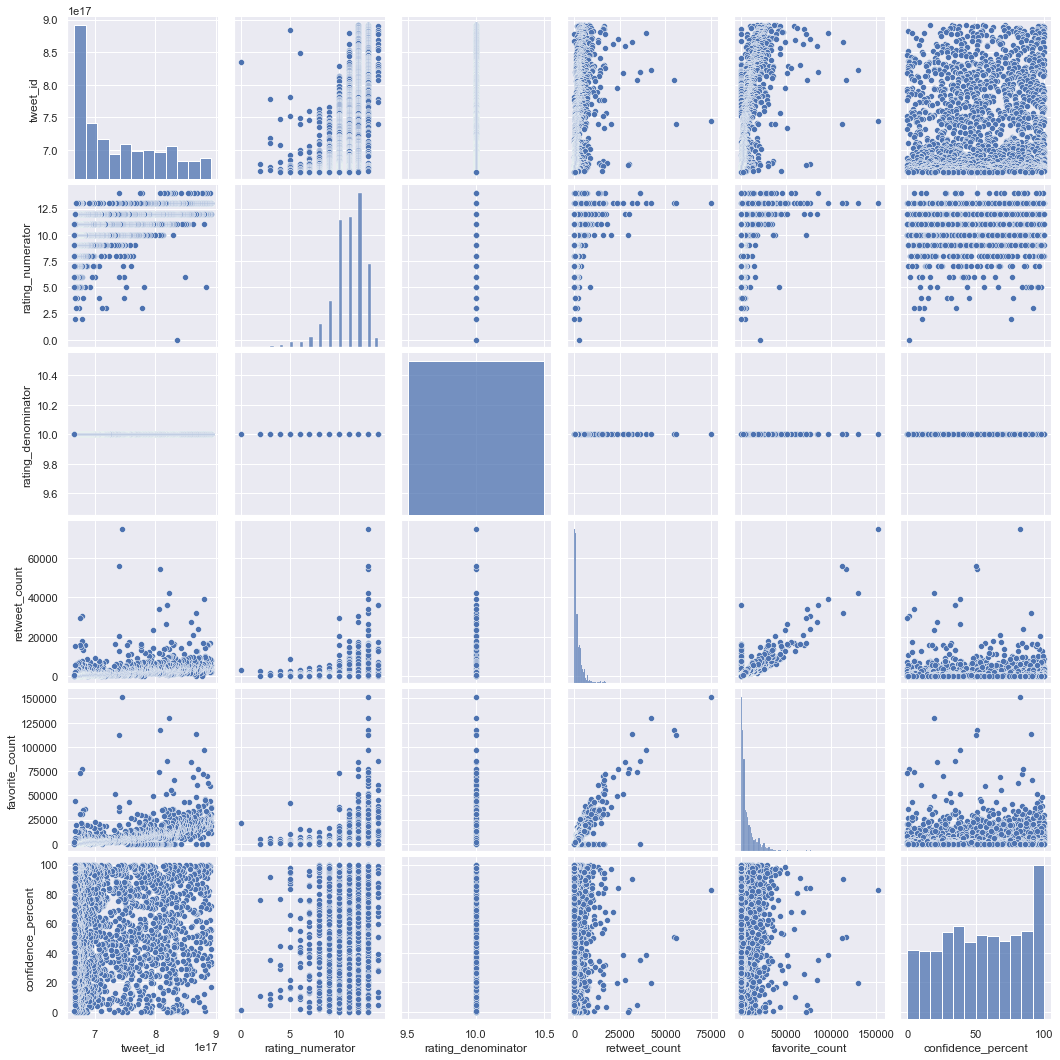

In [757]:
pd.options.display.max_rows = 4000
sns.pairplot(WeRateDogs_twitter_arch_clean);

We can see that confidence and rating_numerator are skewed to the left. This observation indicates that a significant fraction of high confidence data is above 50%, and the majority of dog ratings are in the 10-12 rating range.
favorite_count and retweet_count clearly show a big skew to the right indicating the majority of the data ~75% fall below 10,000 favorite_count and ~75% fall below 2,900 retweet_count.

In [717]:
WeRateDogs_twitter_arch_clean['rating_numerator'].describe()

count    1725.000000
mean     10.863768  
std      1.771943   
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      14.000000  
Name: rating_numerator, dtype: float64

<AxesSubplot:xlabel='rating_numerator', ylabel='Count'>

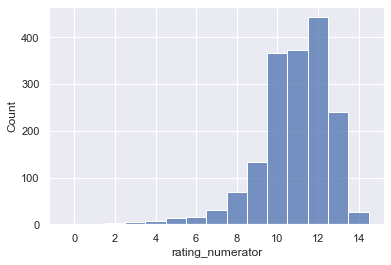

In [718]:
# Let's have a look at the rating_numerator histogram in more detail
import seaborn as sns
sns.histplot(WeRateDogs_twitter_arch_clean['rating_numerator'], discrete=True)

The distribution of ratings is skewed to the left. From the descriptive statistics above we see that more than half of all ratings are between 10 and 12 inclusive.

<AxesSubplot:xlabel='confidence_percent', ylabel='Count'>

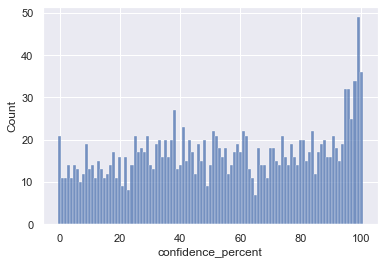

In [719]:
# Let's have a look at the confidence_percent histogram in more detail
import seaborn as sns
sns.histplot(WeRateDogs_twitter_arch_clean['confidence_percent'], discrete=True)

In [720]:
WeRateDogs_twitter_arch_clean['confidence_percent'].describe()

count    1725.000000
mean     54.749715  
std      29.853321  
min      0.001003   
25%      29.996600  
50%      54.740100  
75%      81.795300  
max      99.995600  
Name: confidence_percent, dtype: float64

As shown in the confidence_percent histogram and the descriptive statistics, more than half of all confidence levels are above 54%.

<AxesSubplot:xlabel='favorite_count', ylabel='Count'>

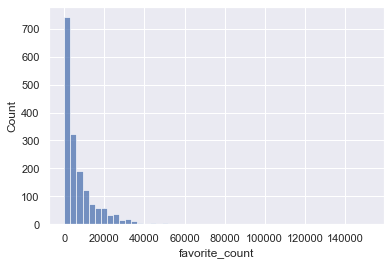

In [730]:
# Let's have a look at the favorite_count histogram in more detail
import seaborn as sns
sns.histplot(WeRateDogs_twitter_arch_clean['favorite_count'], bins=50)

<AxesSubplot:xlabel='retweet_count', ylabel='Count'>

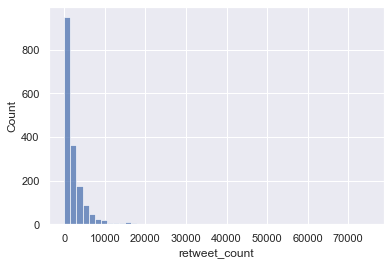

In [733]:
# Let's have a look at the retweet_count histogram in more detail
import seaborn as sns
sns.histplot(WeRateDogs_twitter_arch_clean['retweet_count'], bins=50)

favorite_count and retweet_count histograms clearly show a big skew to the right indicating the majority of the data 
~75% fall below 10,000 favorite_count and ~75% fall below 2,900 retweet_count
Let's investigate this further...

In [758]:
[WeRateDogs_twitter_arch_clean['favorite_count'].describe(), 
 WeRateDogs_twitter_arch_clean['retweet_count'].describe()]

[count    1725.000000  
 mean     8112.731594  
 std      12227.907903 
 min      0.000000     
 25%      1638.000000  
 50%      3685.000000  
 75%      10021.000000 
 max      151887.000000
 Name: favorite_count, dtype: float64,
 count    1725.000000 
 mean     2551.209855 
 std      4508.617270 
 min      10.000000   
 25%      553.000000  
 50%      1257.000000 
 75%      2903.000000 
 max      75036.000000
 Name: retweet_count, dtype: float64]

In [734]:
# Let's see which tweets got the highest favorite_counts
WeRateDogs_twitter_arch_clean.sort_values(by = 'favorite_count', ascending= False).head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,short_urls,stage,breed,retweet_count,favorite_count,confidence_percent
738,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad),https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,None,https://t.co/7wE9LTEXC4,doggo,Labrador_retriever,75036,151887,82.53330
282,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13,10,None,https://t.co/nTz3FtorBc,puppo,Lakeland_terrier,42211,129532,19.60150
376,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy,https://twitter.com/dog_rates/status/807106840509214720/video/1,13,10,Stephan,https://t.co/DkBYaCAg2d,none,Chihuahua,54715,117248,50.53700
102,866450705531457537,2017-05-22 00:28:40+00:00,Twitter for iPhone,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender","https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13,10,Jamesy,https://t.co/wk7TfysWHr,pupper,French_bulldog,31897,113516,90.53340
766,739238157791694849,2016-06-04 23:31:25+00:00,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee),https://twitter.com/dog_rates/status/739238157791694849/video/1,13,10,None,https://t.co/YcXgHfp1EC,doggo,Eskimo_dog,55862,112287,50.33720
54,879415818425184262,2017-06-26 19:07:24+00:00,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici),https://twitter.com/dog_rates/status/879415818425184262/video/1,13,10,Duddles,https://t.co/UDT7ZkcTgY,none,English_springer,39424,96830,38.34040
306,819004803107983360,2017-01-11 02:15:36+00:00,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",14,10,Bo,https://t.co/AdPKrI8BZ1,doggo,Standard_poodle,36319,86007,35.13080
124,859196978902773760,2017-05-02 00:04:57+00:00,Twitter for iPhone,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,https://t.co/g2nSyGenG9,none,Malamute,27707,84290,21.61630
1283,678399652199309312,2015-12-20 02:20:55+00:00,Twitter for iPhone,This made my day. 12/10 please enjoy,https://twitter.com/dog_rates/status/678399652199309312/video/1,12,10,None,https://t.co/VRTbo3aAcm,none,Bedlington_terrier,30312,76997,1.50472
87,870374049280663552,2017-06-01 20:18:38+00:00,Twitter for iPhone,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10,https://twitter.com/dog_rates/status/870374049280663552/photo/1,13,10,Zoey,https://t.co/T1xlgaPujm,none,Golden_retriever,23872,76904,84.10010


In [735]:
# Let's see which tweets got the highest retweet_counts
WeRateDogs_twitter_arch_clean.sort_values(by = 'retweet_count', ascending= False).head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,short_urls,stage,breed,retweet_count,favorite_count,confidence_percent
738,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad),https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,None,https://t.co/7wE9LTEXC4,doggo,Labrador_retriever,75036,151887,82.53330
766,739238157791694849,2016-06-04 23:31:25+00:00,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee),https://twitter.com/dog_rates/status/739238157791694849/video/1,13,10,None,https://t.co/YcXgHfp1EC,doggo,Eskimo_dog,55862,112287,50.33720
376,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy,https://twitter.com/dog_rates/status/807106840509214720/video/1,13,10,Stephan,https://t.co/DkBYaCAg2d,none,Chihuahua,54715,117248,50.53700
282,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13,10,None,https://t.co/nTz3FtorBc,puppo,Lakeland_terrier,42211,129532,19.60150
54,879415818425184262,2017-06-26 19:07:24+00:00,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici),https://twitter.com/dog_rates/status/879415818425184262/video/1,13,10,Duddles,https://t.co/UDT7ZkcTgY,none,English_springer,39424,96830,38.34040
306,819004803107983360,2017-01-11 02:15:36+00:00,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",14,10,Bo,https://t.co/AdPKrI8BZ1,doggo,Standard_poodle,36319,86007,35.13080
305,819015337530290176,2017-01-11 02:57:27+00:00,Twitter for iPhone,RT @dog_rates: This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",14,10,Bo,https://t.co/AdPKrI8BZ1,doggo,Standard_poodle,36319,0,35.13080
379,806629075125202948,2016-12-07 22:38:52+00:00,Twitter for iPhone,"""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10","https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1",13,10,None,https://t.co/f1h2Fsalv9,none,Cocker_spaniel,34191,74019,4.64032
102,866450705531457537,2017-05-22 00:28:40+00:00,Twitter for iPhone,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender","https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13,10,Jamesy,https://t.co/wk7TfysWHr,pupper,French_bulldog,31897,113516,90.53340
1283,678399652199309312,2015-12-20 02:20:55+00:00,Twitter for iPhone,This made my day. 12/10 please enjoy,https://twitter.com/dog_rates/status/678399652199309312/video/1,12,10,None,https://t.co/VRTbo3aAcm,none,Bedlington_terrier,30312,76997,1.50472


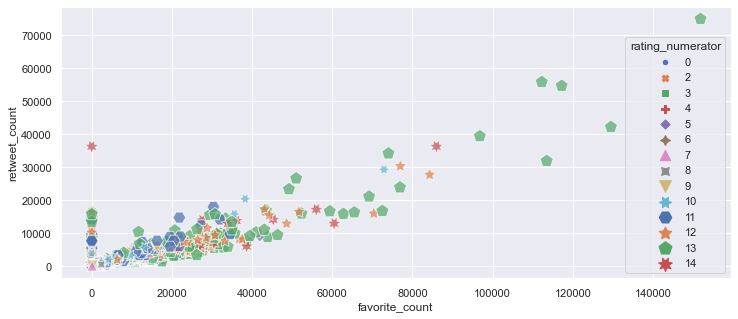

In [755]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=WeRateDogs_twitter_arch_clean, x="favorite_count", y="retweet_count", hue="rating_numerator", size="rating_numerator", palette="deep", sizes=(20, 200), 
                style="rating_numerator", legend="full", alpha= 0.7);

From the scatter plot above, we can conclude that the number of retweets has a strong positive correlation with the number of favorites a tweet receives. Both of these variables are also positively correlated with the rating that the dogs have received (although not as strong of a correlation). 

In [721]:
# Let's see which breed of dogs have the highest ratings
popular_breeds = WeRateDogs_twitter_arch_clean.groupby(['breed', 'rating_numerator'], as_index = True).mean().sort_values('rating_numerator', ascending=False)
popular_breeds.head(20).index

MultiIndex([(             'Rottweiler', 14),
            (         'French_bulldog', 14),
            (   'Old_english_sheepdog', 14),
            (       'Golden_retriever', 14),
            (             'Bloodhound', 14),
            (                'Samoyed', 14),
            (              'Chihuahua', 14),
            (           'Irish_setter', 14),
            (               'Pembroke', 14),
            (        'Standard_poodle', 14),
            ('Black-and-tan_coonhound', 14),
            (     'Labrador_retriever', 14),
            (             'Pomeranian', 14),
            (       'Lakeland_terrier', 14),
            (             'Eskimo_dog', 14),
            (     'Bedlington_terrier', 14),
            (          'Gordon_setter', 14),
            (         'Dandie_dinmont', 13),
            (                 'Saluki', 13),
            (              'Dalmatian', 13)],
           names=['breed', 'rating_numerator'])

As seen above, the highest rated dog breeds are *Rottweiler*, *French_bulldog*, *Old_english_sheepdog*, *Golden_retriever*, *Bloodhound*, *Samoyed*, *Chihuahua*, *Irish_setter*, *Pembroke*, *Standard_poodle*, *tan_coonhound*, *Labrador_retriever*, *Pomeranian*, *Pomeranian*, *Lakeland_terrier*, *Eskimo_dog*, *Bedlington_terrier* and *Gordon_setter*.

Text(0.5, 1.0, 'Distribution of Dog Stages')

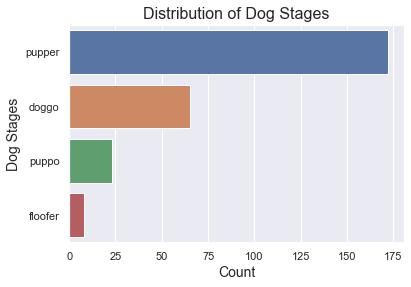

In [722]:
stages = WeRateDogs_twitter_arch_clean['stage'].value_counts().index[1:]
sns.set(style="darkgrid")
sns.countplot(data = WeRateDogs_twitter_arch_clean, y = 'stage', order = stages, orient = 'v')
# plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Stages', fontsize=14)
plt.title('Distribution of Dog Stages',fontsize=16)

In [723]:
WeRateDogs_twitter_arch_clean['stage'].value_counts()

none       1457
pupper     172 
doggo      65  
puppo      23  
floofer    8   
Name: stage, dtype: int64

Based on the data available, *pupper* is the most popular dog stage, followed by *doggo*, *puppo* and *floofer*. It's worth noting that since the majority of the dog stage data were missing, (1457 None values), we cannot infer that this distribution is statistically conclusive.

### Resources:

- [Tweepy API Reference](http://docs.tweepy.org/en/v3.2.0/api.html#API)
- [RegexOne](https://regexone.com/)
- [Python Requests Library](https://pypi.org/project/requests/)
- [Python DataFrame Constructor](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
- [Reading and Writing JSON to a File in Python](https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/)
- [Using a code timer](https://stackoverflow.com/questions/7370801/how-to-measure-elapsed-time-in-python)
- [Handling Exceptions](https://wiki.python.org/moin/HandlingExceptions)
- [Try and Except in Python](https://www.pythonforbeginners.com/error-handling/python-try-and-except)
- [How to Scrape More Information From Tweets on Twitter](https://towardsdatascience.com/how-to-scrape-more-information-from-tweets-on-twitter-44fd540b8a1f)
- [Using conditional to generate new column in pandas dataframe](https://code.i-harness.com/en/q/19c9fbc)